Nama  : Andika Ainur Wibowo

NIM   : 2141720238

Kelas : 3C

# Praktikum 1 Support Vector Machine (Data Dummy)


In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

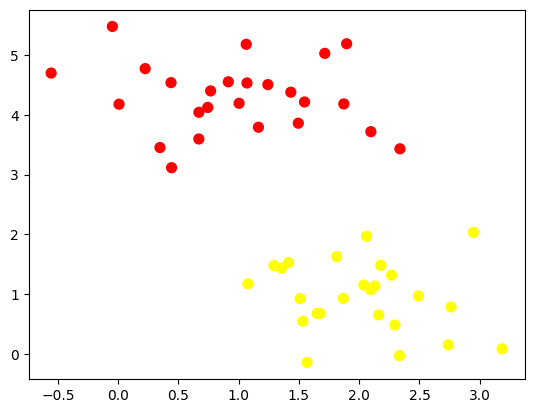

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
# make_blobs function yang digunakan untuk menghasilkan dataset sintetis dengan kelompok yang terdefinisi dengan baik.
# selanjutnya dalam parameter function tersebut terdapat n_samples=50 berfungsi untuk jumlah total sampel yang akan dibuat, centers=2 untuk jumlah kelompok yang akan dibuat
# random_state = 0 ini adalah nilai seed acak untuk menghasilkan dataset yang konsisten
# cluster_std = 0.60 tandar deviasi dari masing-masing kelompok. Semakin besar nilai ini, semakin terdispersi datapoint dalam setiap kelompok.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# X[:, 0] dan X[:, 1] Ini adalah koordinat x dan y dari setiap sampel dalam array
# c=y: Ini mengatur warna titik-titik berdasarkan label yang ada dalam y, sehingga kelompok dengan label yang berbeda akan diplotkan dengan warna yang berbeda.
# s=50: Ini mengatur ukuran dari setiap titik dalam plot.
# cmap= autumn untuk peta warna yang digunakan untuk menggambarkan kelompok.

(-1.0, 3.5)

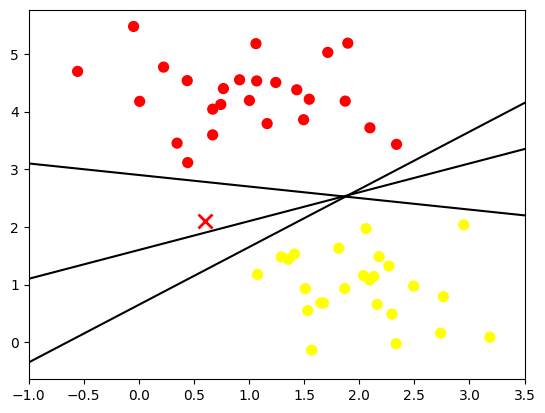

In [4]:
xfit = np.linspace(-1, 3.5)
# xfit = np.linspace(-1, 3.5) membuat serangkaian nilai x untuk digunakan dalam garis regresi linear yang akan diplot.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
# plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) menambahkan tanda "x" berwarna merah pada titik (0.6, 2.1) di plot.
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
# loop for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: mengiterasi melalui beberapa parameter m dan b, dan untuk setiap pasangan ini, garis regresi linear m * xfit + b diplot di atas scatter plot.
plt.xlim(-1, 3.5)
# plt.xlim(-1, 3.5) mengatur batasan sumbu x pada rentang -1 hingga 3.5 dalam plot.

(-1.0, 3.5)

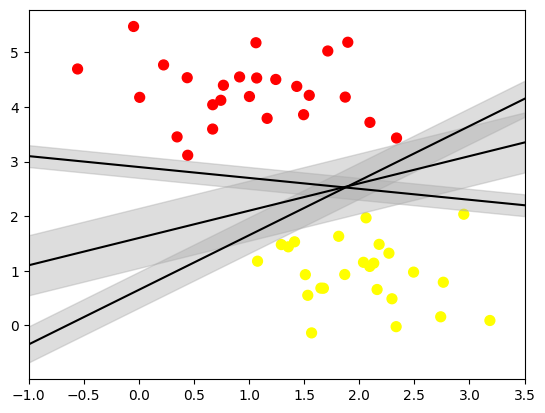

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# **Penerappan fitting SVM**

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In [8]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

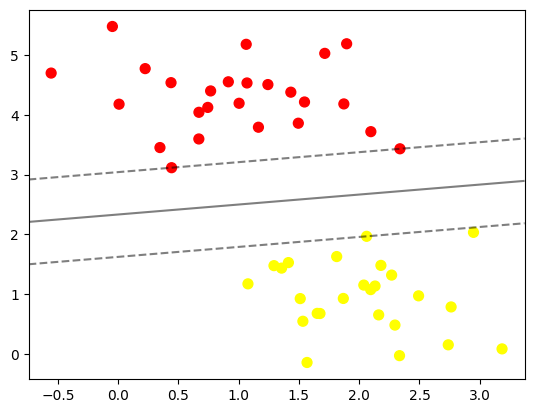

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

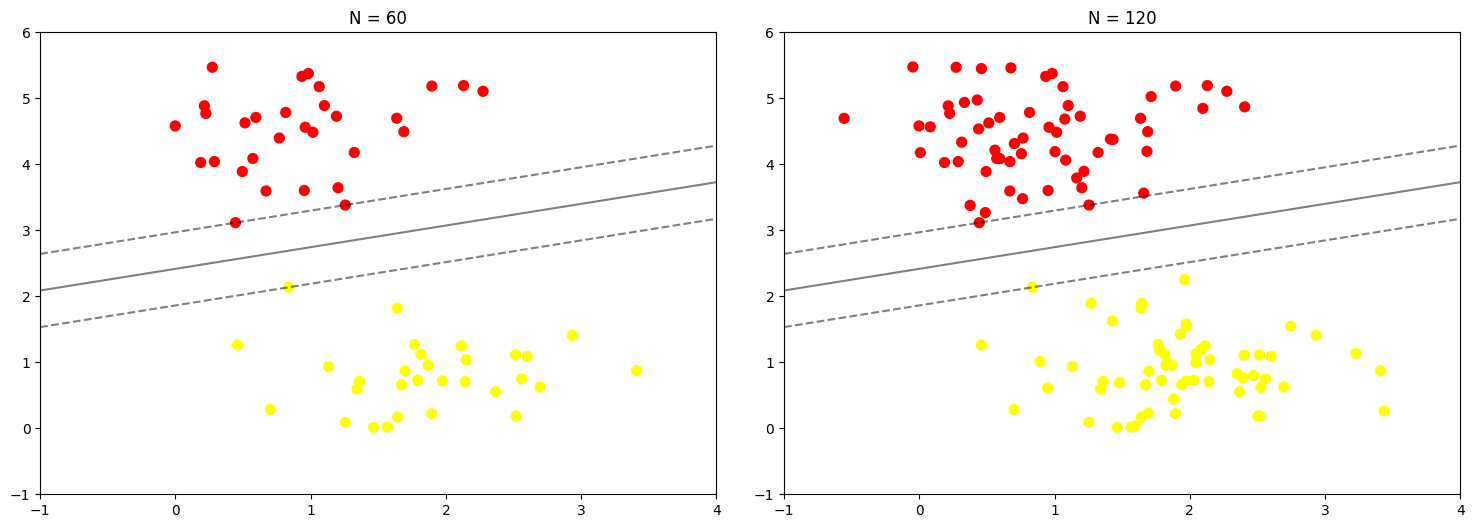

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# **Data Tidak Terpisah Secara Linier**
Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

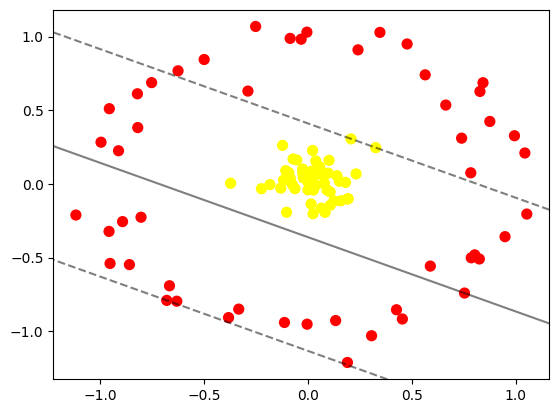

In [11]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [12]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 9.94988131e-01,  3.26606255e-01],
       [ 1.08689946e-01, -1.44696168e-01],
       [-8.36909283e-02,  3.64453285e-02],
       [ 7.87067241e-01, -5.01685199e-01],
       [ 4.14500182e-03,  4.36100950e-02],
       [ 2.68454634e-02, -1.95673775e-03],
       [ 3.47511312e-01,  1.02805060e+00],
       [ 2.32897018e-01,  6.77259911e-02],
       [-1.11548848e+00, -2.11578385e-01],
       [-8.57917754e-01, -5.48067033e-01],
       [ 1.52786965e-01,  1.75816970e-02],
       [ 3.98638472e-02, -9.47880835e-03],
       [ 5.65285916e-01,  7.39931882e-01],
       [-6.78295773e-01, -7.90863203e-01],
       [ 3.07383947e-01, -1.03069913e+00],
       [-9.10380031e-01,  2.24683369e-01],
       [ 1.34527450e-01, -9.27471259e-01],
       [-1.05680993e-01,  8.96896584e-02],
       [ 1.02888210e-01,  1.59853173e-01],
       [-3.85814898e-03,  1.02957638e+00],
       [-1.11780863e-01, -9.40734207e-01],
       [-1.20825815e-01,  2.61227782e-01],
       

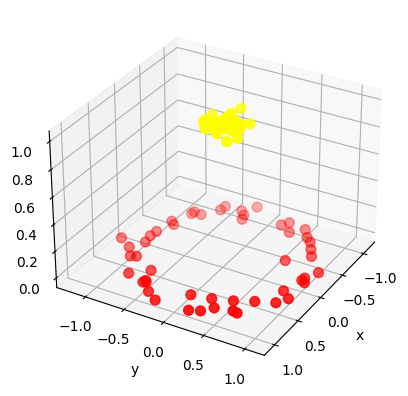

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

# Fungsi untuk membuat plot 3D
def plot_3D(elev=30, azim=30, X=X, y=y):
    if X is None or y is None:
        return

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')


# Variabel X dan y harus didefinisikan sebelumnya
# Anda dapat menggantinya dengan data yang sesuai

# Misalnya:
# X = ...  # Data Anda
# y = ...  # Data target Anda

# Kemudian, panggil fungsi interact
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))


walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [17]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

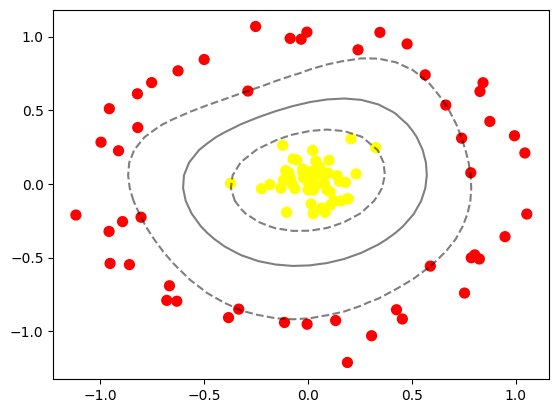

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

# **Data Overlap**

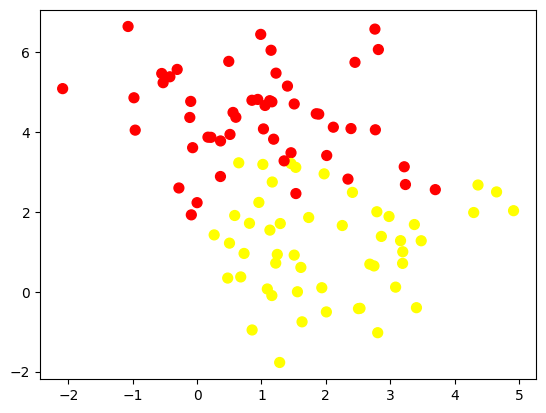

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

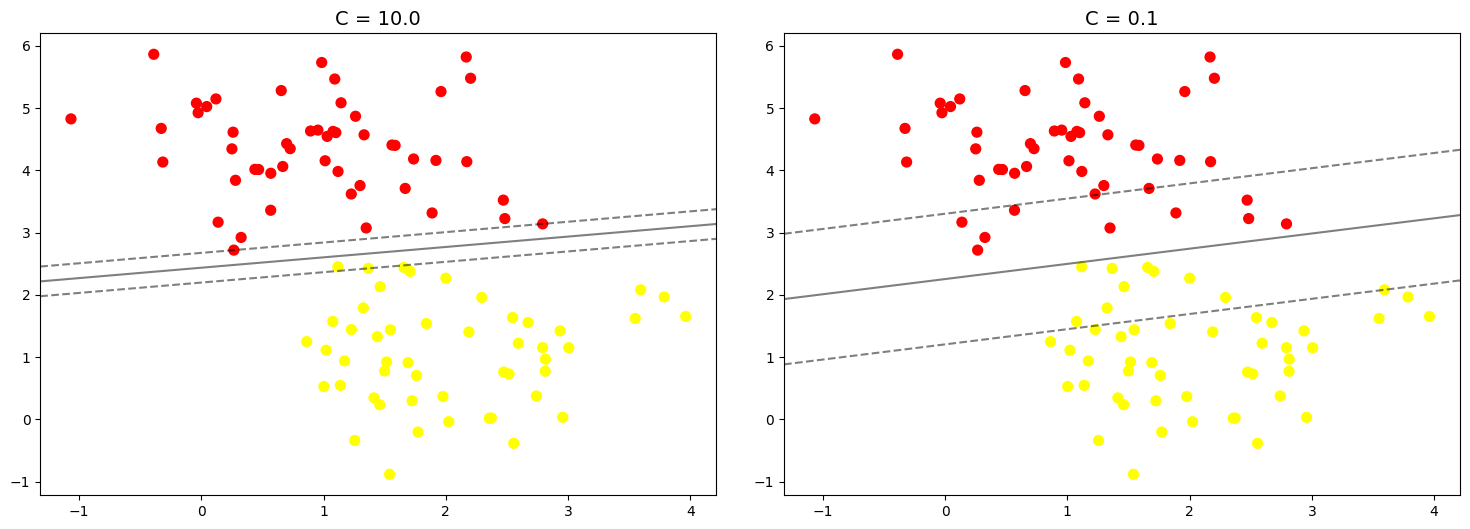

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)